In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

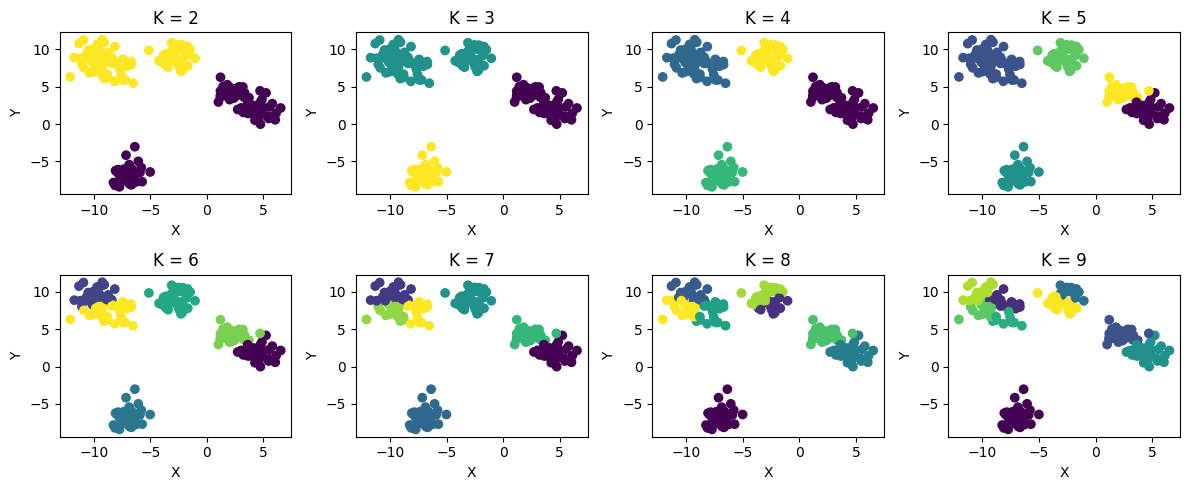

In [2]:
# Generate synthetic data
X, _ = make_blobs(n_samples=200, centers=6, random_state=42)

# Perform K-means clustering for different values of K
k_values = range(2, 10)
wcss = []  # Within-Cluster Sum of Squares
silhouette_scores = []
cluster_assignments = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # WCSS
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    cluster_assignments.append(kmeans.labels_)

# Plot the data clusters
plt.figure(figsize=(12, 5))
for i, clusters in enumerate(cluster_assignments, start=1):
    plt.subplot(2, 4, i)
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
    plt.title(f'K = {i + 1}')
    plt.xlabel('X')
    plt.ylabel('Y')

plt.tight_layout()
plt.show()

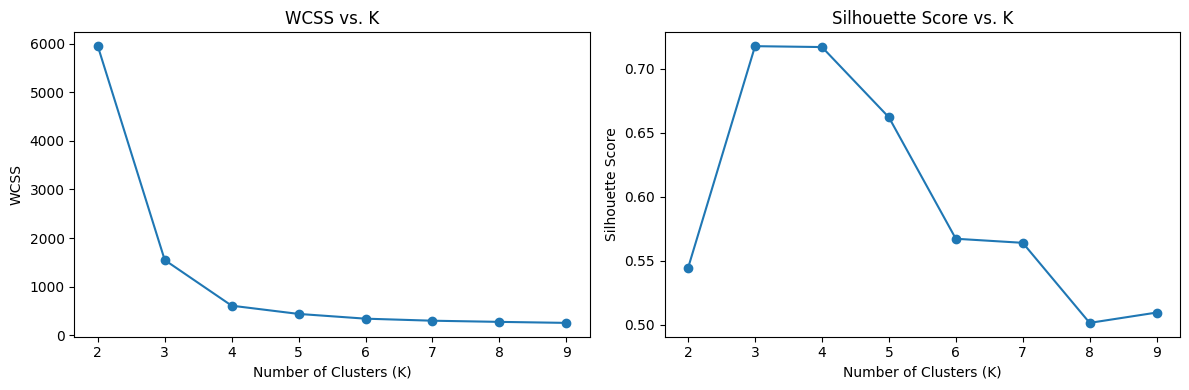

In [3]:
# Plot the WCSS and silhouette scores for different values of K
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker='o')
plt.title('WCSS vs. K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()